## /collections/{collection_id}/processes/area:aggregate-space


In [1]:
import xarray as xr
import requests
from IPython.display import GeoJSON
from shapely.geometry import mapping, box 
import numpy as np

In [2]:
dapa_endpoint = 'http://0.0.0.0:8000'

### Get the DAPA collections

In [3]:
query = '{}/collections'.format(dapa_endpoint)

In [4]:
r = requests.get(query)

In [5]:
r.status_code

200

In [6]:
r.json()

{'collections': [{'id': 'S5P-NO2',
   'title': 'Sentinel-5P NO2 column number density over Europe',
   'extent': {'spatial': {'bbox': [[-13, 57, 33, 33]], 'crs': 'EPSG:4326'},
    'temporal': {'interval': [['2018-05-01T00:00:00/2020-04-01T00:00:00']]}}}]}

In [7]:
collection_bbox = r.json()['collections'][0]['extent']['spatial']['bbox']

In [8]:
collection_bbox

[[-13, 57, 33, 33]]

In [9]:
GeoJSON([{'type': 'Feature', 
          'properties': {},
          'geometry': mapping(box(*collection_bbox[0]))}])

<IPython.display.GeoJSON object>

In [10]:
collection = r.json()['collections'][0]['id']

collection

'S5P-NO2'

### Get the collection variables

In [11]:
query = '{}/collections/{}/variables'.format(dapa_endpoint, collection)

In [12]:
r = requests.get(query)

In [13]:
r.status_code

200

In [14]:
variables = r.json()

variables

{'variables': [{'id': 'tropospheric_NO2_column_number_density',
   'title': 'Troposheric NO2 column number density',
   'uom': 'umol/m2'}]}

In [15]:
variable = variables['variables'][0]['id']

variable

'tropospheric_NO2_column_number_density'

### /collections/{collection_id}/processes/area:aggregate-space

In [16]:
bbox = [2.12, 48.75, 2.52, 48.99]

In [17]:
GeoJSON([{'type': 'Feature', 
          'properties': {},
          'geometry': mapping(box(*bbox))}])

<IPython.display.GeoJSON object>

In [18]:
query = '{}/collections/{}/processes/area:aggregate-space'.format(dapa_endpoint,
                                                                  collection)

query

'http://0.0.0.0:8000/collections/S5P-NO2/processes/area:aggregate-space'

In [19]:
params = {'bbox': '{},{},{},{}'.format(*bbox),
          'variable': variable,
          'function': 'mean'}

Submit the request:

In [20]:
r = requests.get(query, params=params)

Get the HTTP exit code:

In [21]:
r.status_code

200

Print the response

In [22]:
r.json()

{'dims': ['date'],
 'attrs': {},
 'data': [89.29517364501953,
  90.56732177734375,
  99.13817596435547,
  90.04833221435547,
  126.36995697021484,
  159.24241638183594,
  123.55792999267578,
  119.23450469970703,
  162.18939208984375,
  220.191162109375,
  128.9988250732422,
  138.2407989501953,
  100.43775939941406,
  76.95851135253906,
  106.01387786865234,
  110.45691680908203,
  89.2231216430664,
  61.122615814208984,
  111.81029510498047,
  107.68449401855469,
  108.53323364257812,
  77.18075561523438,
  72.72775268554688,
  64.39656829833984],
 'coords': {'date': {'dims': ['date'],
   'attrs': {},
   'data': ['2018-05-01T00:00:00',
    '2018-06-01T00:00:00',
    '2018-07-01T00:00:00',
    '2018-08-01T00:00:00',
    '2018-09-01T00:00:00',
    '2018-10-01T00:00:00',
    '2018-11-01T00:00:00',
    '2018-12-01T00:00:00',
    '2019-01-01T00:00:00',
    '2019-02-01T00:00:00',
    '2019-03-01T00:00:00',
    '2019-04-01T00:00:00',
    '2019-05-01T00:00:00',
    '2019-06-01T00:00:00',
   

In [23]:
xr.DataArray.from_dict(r.json())

<xarray.DataArray 'tropospheric_NO2_column_number_density' (date: 24)>
array([ 89.29517365,  90.56732178,  99.13817596,  90.04833221,
       126.36995697, 159.24241638, 123.55792999, 119.2345047 ,
       162.18939209, 220.19116211, 128.99882507, 138.24079895,
       100.4377594 ,  76.95851135, 106.01387787, 110.45691681,
        89.22312164,  61.12261581, 111.8102951 , 107.68449402,
       108.53323364,  77.18075562,  72.72775269,  64.3965683 ])
Coordinates:
  * date     (date) <U19 '2018-05-01T00:00:00' ... '2020-04-01T00:00:00'

In [24]:
area_space_extracted = xr.DataArray.from_dict(r.json()).assign_coords(date=[np.datetime64(d) for d in xr.DataArray.from_dict(r.json())['date'].values])

In [25]:
area_space_extracted

<xarray.DataArray 'tropospheric_NO2_column_number_density' (date: 24)>
array([ 89.29517365,  90.56732178,  99.13817596,  90.04833221,
       126.36995697, 159.24241638, 123.55792999, 119.2345047 ,
       162.18939209, 220.19116211, 128.99882507, 138.24079895,
       100.4377594 ,  76.95851135, 106.01387787, 110.45691681,
        89.22312164,  61.12261581, 111.8102951 , 107.68449402,
       108.53323364,  77.18075562,  72.72775269,  64.3965683 ])
Coordinates:
  * date     (date) datetime64[ns] 2018-05-01 2018-06-01 ... 2020-04-01

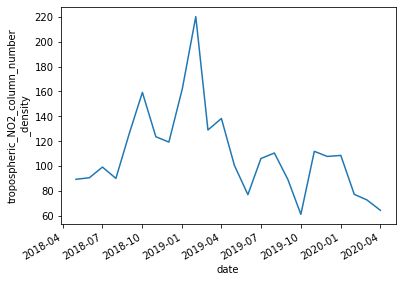

In [26]:
area_space_extracted.plot()